In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib

def get_contestdata(input_json):
    #jsonname="ahc006"
    f=open(f"../input/{input_json}.json")
    js = json.load(f)

    values=[]
    for userdata in js["StandingsData"]:
        if userdata["TotalResult"]["Score"]>0: 
            value=[]
            value.append(userdata["Rank"])
            value.append(userdata["Rating"])
            value.append(userdata["AtCoderRank"])
            value.append(userdata["Competitions"])
            values.append(value)
    output=pd.DataFrame(values)
    output.columns=["Rank","Rating","AtCoderRank","Competitions"]
    output=output[output["Competitions"]>=20] #コンテスト参加数が少ない人は安定性に欠けるため
    output["Rank_norm"]=output["Rank"]/output["Rank"].max()
    #output["Rate_id"]=output["Rating"]//400
    output["Rate_id"]=output["Rating"].apply(lambda x: 7 if x>=2800 else x//400)
    return output

In [2]:
contests=["ahc001","ahc002","ahc003","ahc004","ahc005","recruit","httf","ahc006","ahc007"]

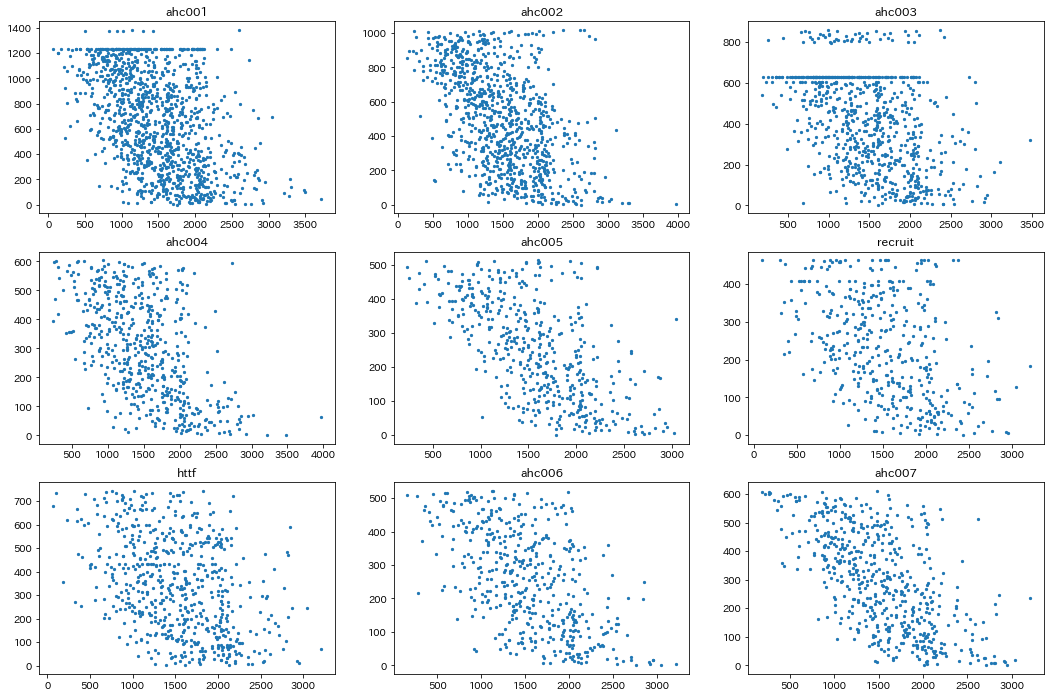

In [3]:

fig, ax= plt.subplots(3,3,figsize=(18, 12))
cnt=0
corr_arr=[]
for i in range(3):
    for j in range(3):
        df=get_contestdata(contests[cnt])
        ax[i][j].scatter(df["Rating"], df["Rank"],s=5)
        #print(contests[cnt])
        ax[i][j].set_title(contests[cnt])
        corr_arr.append(df[["Rating","Rank"]].corr()["Rank"][0])
        cnt+=1

In [4]:
corr_df=pd.DataFrame()
corr_df["contest"]=contests
corr_df["corr"]=corr_arr
corr_df

,contest,corr
0,ahc001,-0.453631
1,ahc002,-0.523407
2,ahc003,-0.437018
3,ahc004,-0.539436
4,ahc005,-0.631356
5,recruit,-0.435103
6,httf,-0.404042
7,ahc006,-0.563150
8,ahc007,-0.627948


In [5]:
#色別の参加者数
result=[]
for n,contest in enumerate(contests):
    df=get_contestdata(contest)

    agg=df["Rate_id"].value_counts().to_frame().T
    agg.set_axis([contest], axis=0, inplace=True)
    if n==0:
        result=agg
    else:
        result=pd.concat([result,agg],axis=0)

In [6]:
color_columns=["灰","茶","緑","水","青","黄","橙","赤"]
result.columns=color_columns
colormap=["gray","brown","green","cyan","blue","yellow","orange","red"]

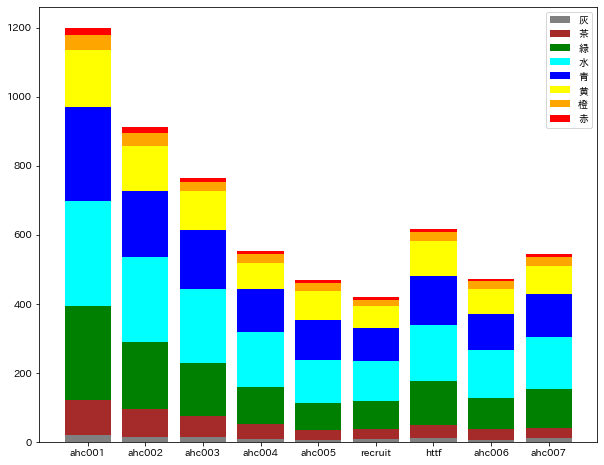

In [7]:
fig, ax = plt.subplots(figsize=(10, 8))
for i in range(len(result.T)):
    ax.bar(result.T.columns, result.T.iloc[i], bottom=result.T.iloc[:i].sum(),color=colormap[i])
ax.legend(result.T.index)
plt.show()

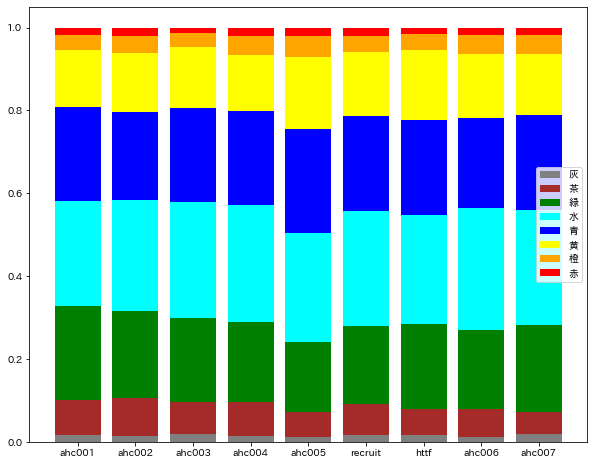

In [8]:
result2=result.apply(lambda x: x/x.sum(), axis=1)

fig, ax = plt.subplots(figsize=(10, 8))
for i in range(len(result.T)):
    ax.bar(result2.T.columns, result2.T.iloc[i], bottom=result2.T.iloc[:i].sum(),color=colormap[i])
ax.legend(result2.T.index)
plt.show()

In [9]:
#100位以内に入っている人の色割合
result=[]
for n,contest in enumerate(contests):
    df=get_contestdata(contest)

    agg=df[df["Rank"]<=100]["Rate_id"].value_counts().to_frame().T
    agg.set_axis([contest], axis=0, inplace=True)
    if n==0:
        result=agg
    else:
        result=pd.concat([result,agg],axis=0)
result.columns=color_columns[1:]

In [10]:
result2=result.apply(lambda x: x/x.sum(), axis=1).T

In [11]:
result2

,ahc001,ahc002,ahc003,ahc004,ahc005,recruit,httf,ahc006,ahc007
茶,NaN,NaN,0.011364,0.010753,NaN,NaN,NaN,NaN,NaN
緑,0.021739,0.034091,0.034091,0.043011,0.010526,0.054348,0.043011,0.031579,0.010989
水,0.163043,0.159091,0.102273,0.107527,0.157895,0.163043,0.161290,0.210526,0.131868
青,0.326087,0.272727,0.352273,0.204301,0.242105,0.304348,0.268817,0.273684,0.296703
黄,0.315217,0.250000,0.340909,0.376344,0.378947,0.326087,0.408602,0.315789,0.318681
橙,0.108696,0.147727,0.113636,0.150538,0.136842,0.108696,0.086022,0.105263,0.175824
赤,0.065217,0.136364,0.045455,0.107527,0.073684,0.043478,0.032258,0.063158,0.065934


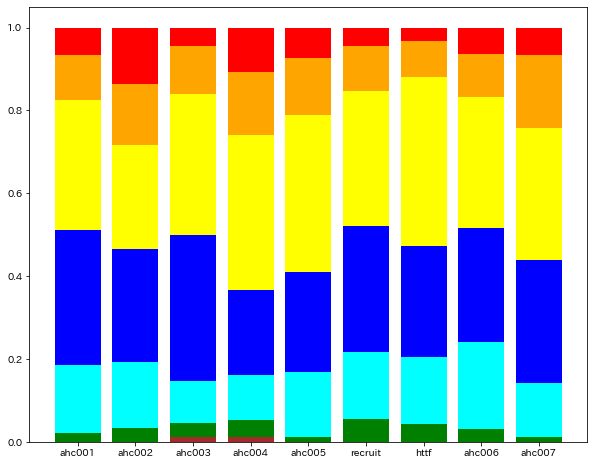

In [12]:
fig, ax = plt.subplots(figsize=(10, 8))
for i in range(len(result2)):
    ax.bar(result2.columns, result2.iloc[i], bottom=result2.iloc[:i].sum(),color=colormap[i+1])
#ax.legend(result2.index)
plt.show()

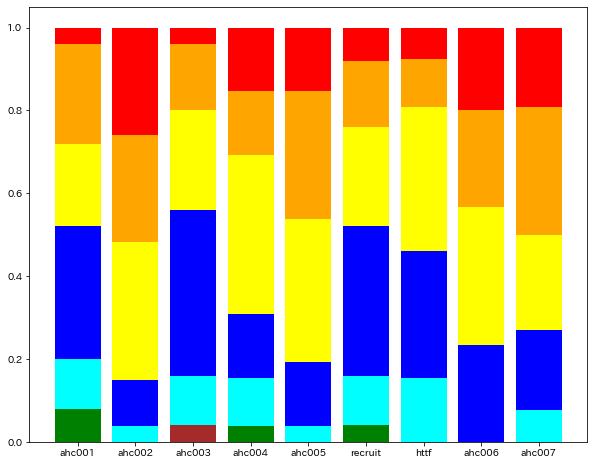

In [13]:
#30位以内に入っている人の色割合
result=[]
for n,contest in enumerate(contests):
    df=get_contestdata(contest)
    agg=df[df["Rank"]<=30]["Rate_id"].value_counts().to_frame().T
    agg.set_axis([contest], axis=0, inplace=True)
    if n==0:
        result=agg
    else:
        result=pd.concat([result,agg],axis=0)
result.columns=color_columns[1:]

result2=result.apply(lambda x: x/x.sum(), axis=1).T
fig, ax = plt.subplots(figsize=(10, 8))
for i in range(len(result2)):
    ax.bar(result2.columns, result2.iloc[i], bottom=result2.iloc[:i].sum(),color=colormap[i+1])
plt.show()